In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_in_data(output_file, resample_window = "10s"):
    df = pd.read_csv(output_file, parse_dates=["start", "end"], infer_datetime_format=True)
    df = df.set_index("start")[["worker"]]
    df = df.groupby("worker").resample(resample_window).count()
    df.columns = ["occurances"]
    return df


In [3]:
def aggregate_data(df, group_by = ["start"]):
    sum_occurances_df = df.reset_index()
    sum_occurances_df = sum_occurances_df.groupby(group_by)[["occurances"]].sum()
    
    sum_occurances_df = sum_occurances_df.reset_index()
    min_time = sum_occurances_df["start"].min()
    sum_occurances_df["start"] = sum_occurances_df["start"].apply(lambda x: int((x - min_time).total_seconds()))
    sum_occurances_df = sum_occurances_df.set_index("start")
    
    if len(group_by) > 1:
        sum_occurances_df = sum_occurances_df.reset_index().pivot(index=group_by[0], columns=group_by[1:])
    
    return sum_occurances_df

In [4]:
def plot_agg_df(agg_df):
    fig, ax = plt.subplots(figsize=(24, 10))
    ax = agg_df.plot(kind="bar", ax=ax, rot=45, stacked=True, title="Tasks Started Per Worker")
    ax.legend(loc='upper left')
    ax.set_xlabel("Number of Tasks Started")
    ax.set_ylabel("Seconds Elapsed")

In [5]:
mp_df = read_in_data("output/output-multiprocessing-pool-100000_workers-7_sleep-0_25.csv", resample_window = "30s")
t_df = read_in_data("output/output-threads-100000_workers-7_sleep-0_25.csv", resample_window = "30s")

In [6]:
mp_agg_df = aggregate_data(mp_df)
t_agg_df = aggregate_data(t_df)

In [7]:
mp_agg_worker_df = aggregate_data(mp_df, ["start", "worker"])
t_agg_worker_df = aggregate_data(t_df, ["start", "worker"])

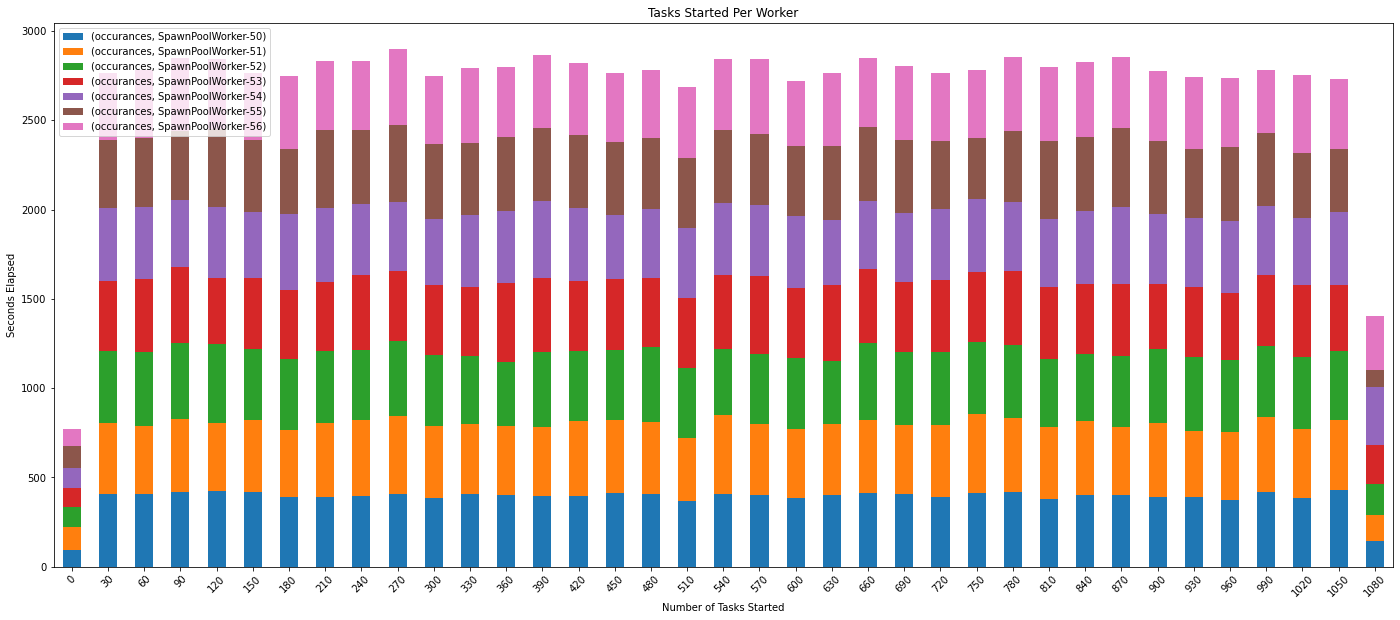

In [8]:
plot_agg_df(mp_agg_worker_df)

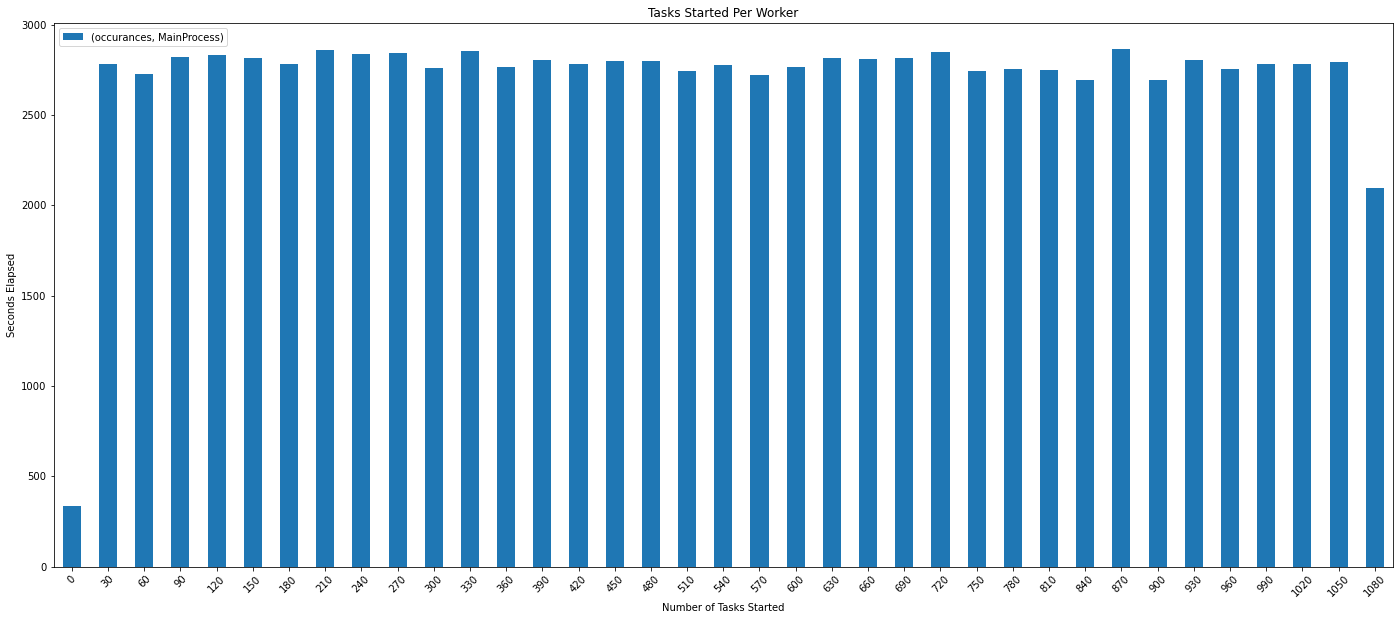

In [9]:
plot_agg_df(t_agg_worker_df)